<a href="https://colab.research.google.com/github/Viviankatheu/Football-Analysis-Mchezopesa-Ltd/blob/main/Vivian_Katheu_Moringa_Week_6_Core_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mchezopesa Ltd Football Predictions - Supervised Learning with EDA

##1.Defining the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).



###a)Specifying the Question

Mchezo pesa is a football analyst company in East Africa. Mchezo-Pesa would like to predict the result of a game based whether the teams playing are in their home country or not and whether the game is friendly or not.

###b)Defining the Metric for Success

This project will be successful when we accurately predict the winning team based on the Home team or away team and the type of tournament.

I hope to achieve atleast 80% accuracy with our models and have the lowest RMSE score possible

###c)Understanding the context

The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium.The teams of the men's member nations of FIFA, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.

A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.

We are going to use this ranking system to try and predict the scoresof the home and away teams based on previous rankings.

The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams. The current version of the ranking system was first used on 16 August 2018, adapted from the Elo rating system used in chess and Go.

###d)Recording the Experimental Design

1. To specify the question

2. Find and deal with outliers and other anomalies such as missing data and duplicates

3. Perform exploratory data analysis on the dataset. I will do both univariate and bivariate analysis.

4. Use polynomial and logistic regression models to predict the scores.

5. Use cross validation to make the most of our data.

6. Draw a conclusion

###e)Data Relevance

Rank - Position of a country based on football performance

Date - date of the match

Home_team - the name of the home team

Away_team - the name of the away team

Home_score - full-time home team score including extra time, not including penalty-shootouts

Away_score - full-time away team score including extra time, not including penalty-shootouts

Tournament - the name of the tournament

City - the name of the city/town/administrative unit where the match was played

Country - the name of the country where the match was played

Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

##2.Reading the Data

In [1]:
#Importing the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading our Fifa Ranking Dataset
rank = pd.read_csv('fifa_ranking.csv')
rank

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,8/8/1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,6/7/2018
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,6/7/2018
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,6/7/2018
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,6/7/2018


In [3]:
#Loading the results dataset

results = pd.read_csv('results.csv')
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,7/18/2019,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,7/18/2019,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,7/19/2019,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,7/19/2019,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


##3.Checking the Data

In [4]:
#Previewing the top of our fifa ranking dataset
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,8/8/1993


In [5]:
#Previewing the bottom of Fifa ranking the dataset
rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,6/7/2018
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,6/7/2018
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,6/7/2018
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,6/7/2018
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,6/7/2018


In [6]:
#Previewing the top of the results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
#Previewing the tail of the Dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,7/18/2019,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,7/18/2019,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,7/19/2019,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,7/19/2019,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,7/20/2019,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [8]:
#Checking the data type of the Fifa ranking dataset
rank.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [9]:
#Checking the data type of the results dataset
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [10]:
#Checking the shape of the fifa ranking dataset
rank.shape

(57793, 16)

In [11]:
#Checking the shape of the results dataset
results.shape

(40839, 9)

##4.External Datasource Validation

##5.Tidying the Dataset

In [12]:
#Checking for missing values
rank.isnull().sum()

#From the output, we have no missing values

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [13]:
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [14]:
#Checking for duplicates

rank.duplicated().sum()

37

In [15]:
rank[rank.duplicated()]

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41320,113,Sudan,SDN,297.13,304,-1,126.55,126.55,219.72,109.86,67.36,20.21,202.53,40.51,CAF,12/21/2011
41536,120,Sudan,SDN,264.81,297,-7,129.14,129.14,163.12,81.56,40.91,12.27,209.21,41.84,CAF,1/18/2012
41736,111,Sudan,SDN,301.67,265,9,156.34,156.34,163.12,81.56,40.91,12.27,257.48,51.50,CAF,2/15/2012
41944,110,Sudan,SDN,299.75,302,1,156.34,156.34,163.12,81.56,46.75,14.03,239.09,47.82,CAF,3/7/2012
42157,113,Sudan,SDN,292.03,300,-3,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,4/11/2012
42366,113,Sudan,SDN,292.03,292,0,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,5/9/2012
42562,101,Sudan,SDN,338.25,292,12,179.70,179.70,209.32,104.66,7.08,2.12,258.83,51.77,CAF,6/6/2012
42775,105,Sudan,SDN,329.36,338,-4,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,7/4/2012
42983,104,Sudan,SDN,329.36,329,1,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,8/8/2012
43193,103,Sudan,SDN,331.79,329,1,169.05,169.05,187.77,93.88,108.13,32.44,182.11,36.42,CAF,9/5/2012


In [16]:
#Checking for duplicates in the results dataset
results.duplicated().sum()

0

In [17]:
rank.rank_date = pd.to_datetime(rank.rank_date)
results.date = pd.to_datetime(results.date)


In [18]:
rank.rank_date.dt.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [19]:
results.date.dt.year.unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [20]:
# Remove the day from the date time
results['date'] = results['date'].dt.strftime('%Y-%m')
results.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03,England,Scotland,4,2,Friendly,London,England,False
2,1874-03,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03,England,Scotland,2,2,Friendly,London,England,False
4,1876-03,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [21]:
# Remove the day from the date time
rank['rank_date'] = rank['rank_date'].dt.strftime('%Y-%m')
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08


In [22]:
#Dropping the unnecessary columns
rank = rank.drop(columns=['country_abrv', 'total_points', 'rank_change','cur_year_avg',
                   'cur_year_avg_weighted', 'previous_points', 'last_year_avg',	'last_year_avg_weighted', 'two_year_ago_avg',
                   'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted',
                   'confederation'])

In [23]:
home_merged = pd.merge(results, rank, how = 'inner', left_on=['date', 'home_team'], right_on=['rank_date', 'country_full'])

In [24]:
away_merged = pd.merge(results, rank, how = 'inner', left_on=['date', 'away_team'], right_on=['rank_date', 'country_full'])

In [25]:
fifa_final = pd.merge(home_merged, away_merged, how='inner', left_on=['date', 'away_team', 'home_score', 'away_score', 'home_team', 'tournament', 'country'], right_on=['date', 'away_team', 'home_score', 'away_score', 'home_team', 'tournament', 'country'])

In [26]:
fifa_final.head()

,date,home_team,away_team,home_score,away_score,tournament,city_x,country,neutral_x,rank_x,country_full_x,rank_date_x,city_y,neutral_y,rank_y,country_full_y,rank_date_y
0,1993-08,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,19,Colombia,1993-08,Barranquilla,False,67,Paraguay,1993-08
1,1993-08,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,19,Colombia,1993-08,Barranquilla,False,5,Argentina,1993-08
2,1993-08,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,19,Colombia,1993-08,Barranquilla,False,70,Peru,1993-08
3,1993-08,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,70,Peru,1993-08,Lima,False,5,Argentina,1993-08
4,1993-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,70,Peru,1993-08,Lima,False,19,Colombia,1993-08


In [27]:
fifa_final  = fifa_final.drop(columns=['city_x', 'city_y', 'country', 'neutral_x', 'neutral_y', 'rank_date_x', 'rank_date_y', 'country_full_x', 'country_full_y'])
fifa_final

,date,home_team,away_team,home_score,away_score,tournament,rank_x,rank_y
0,1993-08,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,67
1,1993-08,Colombia,Argentina,2,1,FIFA World Cup qualification,19,5
2,1993-08,Colombia,Peru,4,0,FIFA World Cup qualification,19,70
3,1993-08,Peru,Argentina,0,1,FIFA World Cup qualification,70,5
4,1993-08,Peru,Colombia,0,1,FIFA World Cup qualification,70,19
...,...,...,...,...,...,...,...,...
17024,2018-06,Nigeria,Iceland,2,0,FIFA World Cup,48,22
17025,2018-06,Nigeria,Argentina,1,2,FIFA World Cup,48,5
17026,2018-06,Australia,Peru,0,2,FIFA World Cup,36,11
17027,2018-06,Senegal,Colombia,0,1,FIFA World Cup,27,16


In [28]:
fifa_final.shape

(17029, 8)

In [29]:
#Creating a new results column
fifa_final['result'] = fifa_final['home_score'] - fifa_final['away_score']

In [30]:
#creating a function for the win ,loss and draw

def result(x):
  if x >0:
    return 'win'
  elif x<0:
    return 'loss'
  else:
    return 'draw'

In [31]:
#Implementing and applying our function

fifa_final['results']=fifa_final.result.apply(lambda x: result(x))

In [32]:
fifa_final.tournament = fifa_final.tournament.apply(lambda x: 'World Cup' if x == 'FIFA World Cup qualification' 
                                            else ( 'World Cup' if x == 'FIFA World Cup' else ('Friendly' if x == 'Friendly' else 'Other')))

In [33]:
fifa_final.head()

,date,home_team,away_team,home_score,away_score,tournament,rank_x,rank_y,result,results
0,1993-08,Colombia,Paraguay,0,0,World Cup,19,67,0,draw
1,1993-08,Colombia,Argentina,2,1,World Cup,19,5,1,win
2,1993-08,Colombia,Peru,4,0,World Cup,19,70,4,win
3,1993-08,Peru,Argentina,0,1,World Cup,70,5,-1,loss
4,1993-08,Peru,Colombia,0,1,World Cup,70,19,-1,loss


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

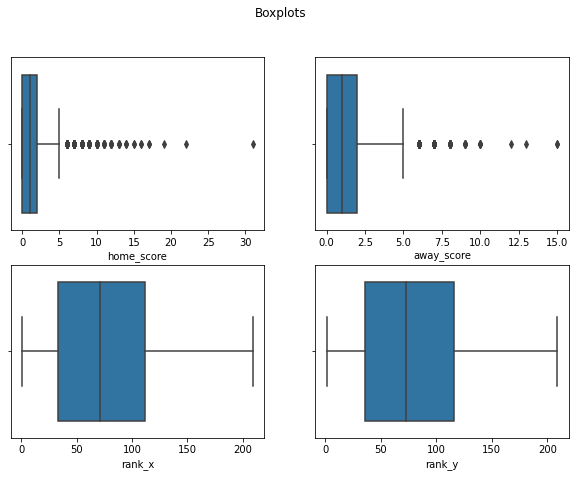

In [34]:
#Checking for outliers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(fifa_final['home_score'], ax=ax1)
sns.boxplot(fifa_final['away_score'], ax=ax2)
sns.boxplot(fifa_final['rank_x'], ax=ax3)
sns.boxplot(fifa_final['rank_y'], ax=ax4)
plt.show()

In [35]:
#Dropping the outliers in home and away scores
fifa_final.drop(fifa_final[fifa_final['home_score']>5].index, inplace=True)

In [36]:
fifa_final.drop(fifa_final[fifa_final['away_score']>5].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

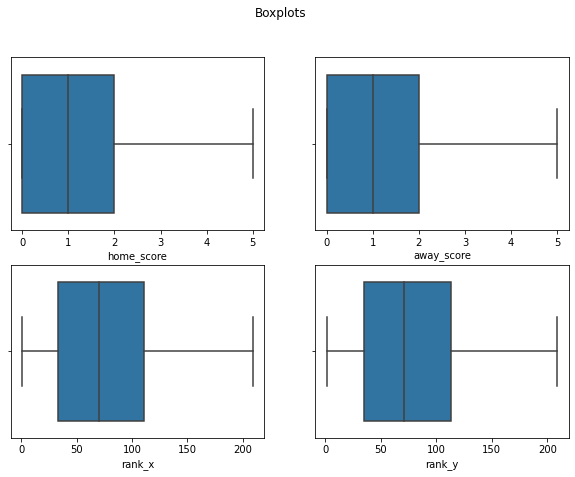

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(fifa_final['home_score'], ax=ax1)
sns.boxplot(fifa_final['away_score'], ax=ax2)
sns.boxplot(fifa_final['rank_x'], ax=ax3)
sns.boxplot(fifa_final['rank_y'], ax=ax4)
plt.show()

In [38]:
#Checking for missing values
fifa_final.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
rank_x        0
rank_y        0
result        0
results       0
dtype: int64

In [39]:
#Checking for duplicates
fifa_final.duplicated().sum()

164

In [40]:
fifa_final[fifa_final.duplicated()]

,date,home_team,away_team,home_score,away_score,tournament,rank_x,rank_y,result,results
309,1994-06,Australia,South Africa,1,0,Friendly,47,76,1,win
310,1994-06,Australia,South Africa,1,0,Friendly,47,76,1,win
311,1994-06,Australia,South Africa,1,0,Friendly,47,76,1,win
541,1994-12,Mali,Mauritania,0,0,Friendly,52,137,0,draw
542,1994-12,Mali,Mauritania,0,0,Friendly,52,137,0,draw
...,...,...,...,...,...,...,...,...,...,...
14415,2014-11,South Africa,Sudan,2,1,Other,51,115,1,win
14449,2014-11,Sudan,Congo,0,1,Other,115,59,-1,loss
15166,2015-11,Ethiopia,Tanzania,1,1,Other,114,135,0,draw
15167,2015-11,Ethiopia,Tanzania,1,1,Other,114,135,0,draw


In [41]:
fifa_final.drop_duplicates(subset=['date','home_team','away_team','home_score','away_score','tournament'], keep= 'first', inplace= True)

In [42]:
fifa_final.duplicated().sum()

0

In [43]:
#Renaming columns
fifa_final.rename(columns={'rank_x' : 'home_team_rank', 'rank_y' : 'away_team_rank'}, inplace=True)
fifa_final.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,result,results
0,1993-08,Colombia,Paraguay,0,0,World Cup,19,67,0,draw
1,1993-08,Colombia,Argentina,2,1,World Cup,19,5,1,win
2,1993-08,Colombia,Peru,4,0,World Cup,19,70,4,win
3,1993-08,Peru,Argentina,0,1,World Cup,70,5,-1,loss
4,1993-08,Peru,Colombia,0,1,World Cup,70,19,-1,loss


##6.Exploratory Data Analysis

###Univariate Analysis

####Categorical Variables

In [44]:
#Frequency Tables
fifa_final['home_team'].value_counts().to_frame()

,home_team
Mexico,238
Saudi Arabia,201
Japan,193
Oman,184
Qatar,182
...,...
Cook Islands,7
Anguilla,6
Montserrat,5
Gibraltar,4


In [45]:
fifa_final['away_team'].value_counts().to_frame()

,away_team
Zambia,187
Sweden,158
Paraguay,157
Finland,156
Colombia,155
...,...
Kosovo,6
American Samoa,6
Turks and Caicos Islands,6
Gibraltar,5


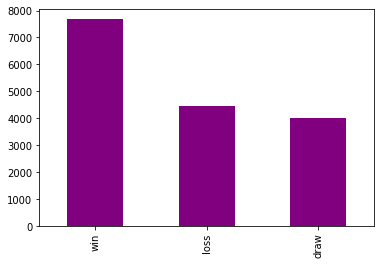

In [46]:
fifa_final['results'].value_counts().plot.bar(color='purple')

####Pie Charts

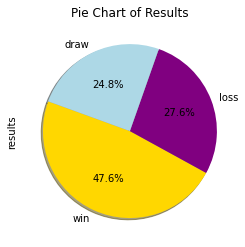

In [47]:
colors = ['gold', 'purple', 'lightblue']
fifa_final['results'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, 
                                               shadow = True, startangle = 160)
plt.title('Pie Chart of Results')
plt.show()

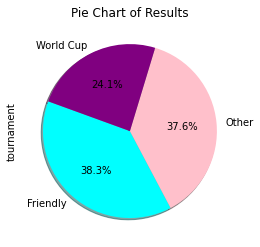

In [48]:
colors = ['cyan', 'pink', 'purple']
fifa_final['tournament'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, 
                                               shadow = True, startangle = 160)
plt.title('Pie Chart of Results')
plt.show()

###Numerical Variables

####Measures of Central Tendency

In [49]:
fifa_final['away_score'].mean()

1.0295847001299747

In [50]:
fifa_final['home_score'].mean()

1.4690227146128614

In [51]:
fifa_final['away_score'].median()

1.0

In [52]:
fifa_final['home_score'].median()

1.0

In [53]:
fifa_final['away_score'].mode()

0    0
dtype: int64

In [54]:
fifa_final['home_score'].mode()

0    1
dtype: int64

####Measures of Dispersion

In [55]:
fifa_final['home_score'].std()

1.2812024390453602

In [56]:
fifa_final['away_score'].std()

1.1048033312209988

In [57]:
fifa_final['home_score'].var()

1.64147968981578

In [58]:
fifa_final['away_score'].var()

1.220590400677016

In [59]:
fifa_final['home_score'].kurt()

-0.000556469544579663

In [60]:
fifa_final['home_score'].kurt()

-0.000556469544579663

####Histograms

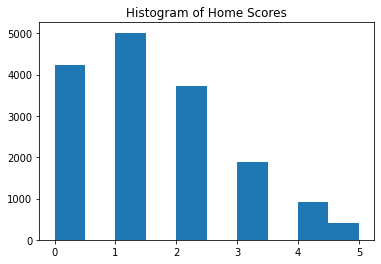

In [61]:
#Histogram of home scores
plt.figure(figsize = [6,4])
plt.hist(fifa_final['home_score'])
plt.title('Histogram of Home Scores')
plt.show()

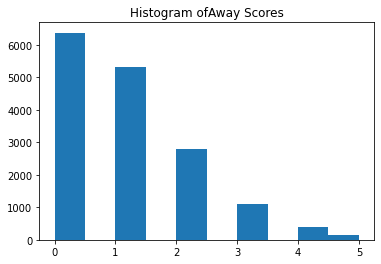

In [62]:
#Histogram of home scores
plt.figure(figsize = [6,4])
plt.hist(fifa_final['away_score'])
plt.title('Histogram ofAway Scores')
plt.show()

###Bivariate Analysis

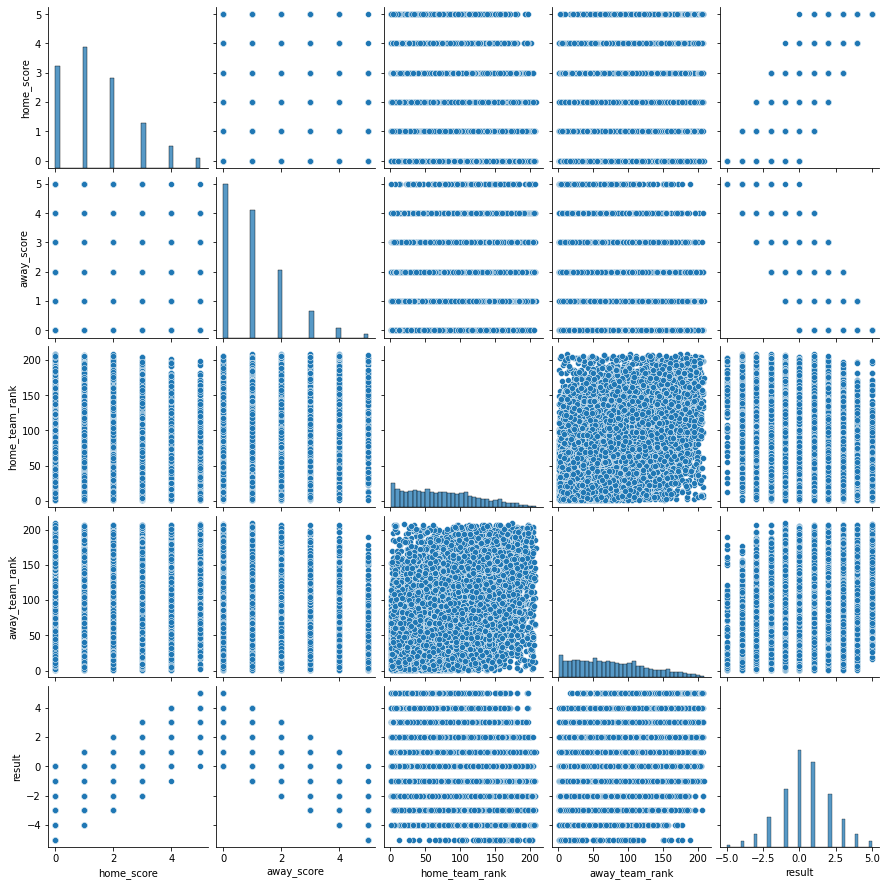

In [63]:
#Pairplots
sns.pairplot(fifa_final, hue=None)

####Numerical and Numerical

In [64]:
#Correlation Matrix
fifa_final.corr()

,home_score,away_score,home_team_rank,away_team_rank,result
home_score,1.000000,-0.126252,-0.161320,0.261278,0.791781
away_score,-0.126252,1.000000,0.178176,-0.190427,-0.705882
home_team_rank,-0.161320,0.178176,1.000000,0.487638,-0.224898
away_team_rank,0.261278,-0.190427,0.487638,1.000000,0.303816
result,0.791781,-0.705882,-0.224898,0.303816,1.000000


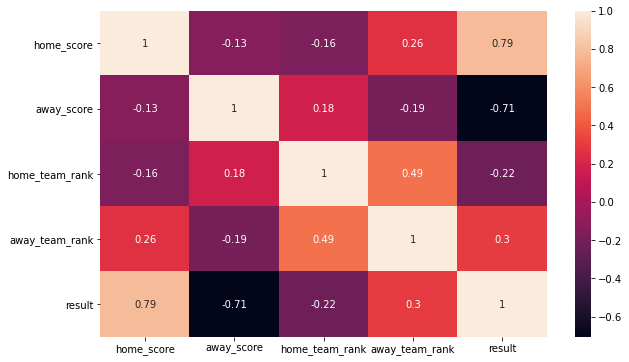

In [65]:
#Plotting a heatmap
plt.figure(figsize = (10,6))
sns.heatmap(fifa_final.corr(),annot= True)
plt.show()

####Categorical and Numerical

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Home Score vs Results')

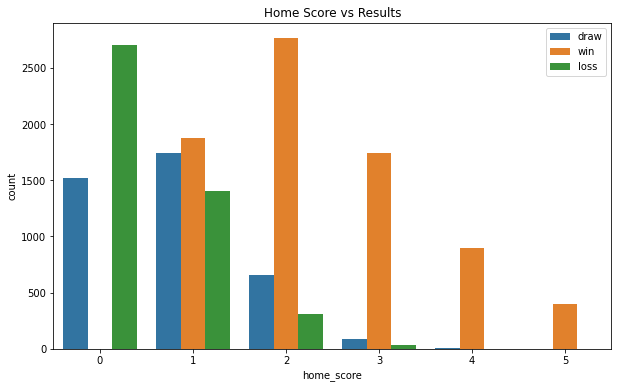

In [66]:
plt.figure(figsize=(10,6))
sns.countplot('home_score', hue='results', data=fifa_final)
plt.legend(loc="upper right")
plt.title('Home Score vs Results')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Away Score vs Results')

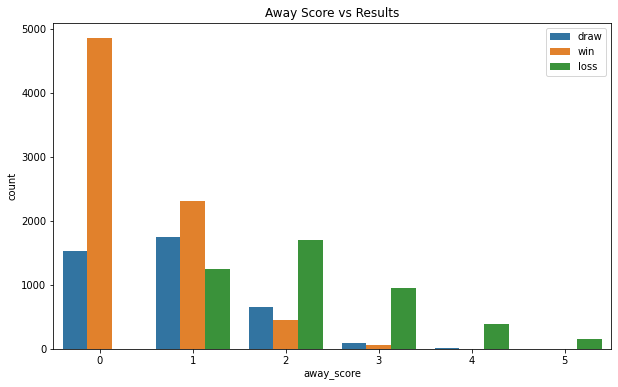

In [67]:
plt.figure(figsize=(10,6))
sns.countplot('away_score', hue='results', data=fifa_final)
plt.legend(loc="upper right")
plt.title('Away Score vs Results')

##7.Implementing the Solution

###Polynomial Regression

####Approach 1 : Model 1 - Predicting the Home Score

In [68]:
#Importing the libraries we are going to use

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fifa_final['tournament'] =le.fit_transform(fifa_final['tournament'])

In [70]:
#Defining our dependent and independent variables
X = fifa_final[['home_team_rank','away_team_rank','tournament']].values
y = fifa_final['home_score'].values

In [71]:
#Splitting the data into train and test tests

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.3,random_state=42)

In [72]:
correlations= fifa_final[['home_team_rank','away_team_rank','tournament']].corr()
correlations

,home_team_rank,away_team_rank,tournament
home_team_rank,1.000000,0.487638,0.025313
away_team_rank,0.487638,1.000000,0.005498
tournament,0.025313,0.005498,1.000000


In [73]:
#Calculating the VIF Scores
vif=pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
vif

,home_team_rank,away_team_rank,tournament
home_team_rank,1.312859,-0.640037,-0.029713
away_team_rank,-0.640037,1.312057,0.008987
tournament,-0.029713,0.008987,1.000703


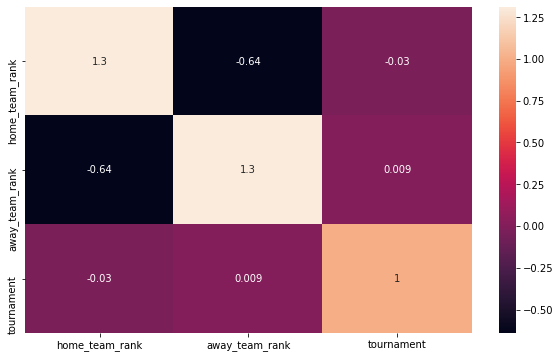

In [74]:
plt.figure(figsize = (10, 6))
sns.heatmap(vif, annot = True)
plt.show()

Since the VIF Scores are below 5, we conclude that there's no multicollinearity between our independent variables. We will work with them that way.

In [75]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

In [76]:
#Training the Model
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
#Making Predictions
y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

In [78]:
#Measuring the accuracy of the model

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9257406128497909
Mean Squared Error: 1.3378742193420512
Root Mean Squared Error: 1.1566651284369436


#####Performing heteroskedasticity for our model

Let's start by creating a model based on our revised set of independent variables above, then displaying the residual plot for it.

In [79]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-0.013154433891407571

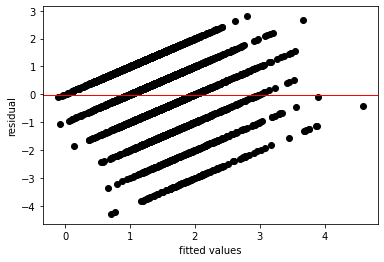

In [80]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [81]:
#Performing Bartlett's Test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


####Model 2:Predicting Away Score

In [82]:
#Defining our dependent and independent variables
X = fifa_final[['home_team_rank','away_team_rank','tournament']].values
y = fifa_final['away_score'].values

In [83]:
#Splitting the data into train and test tests

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.3,random_state=42)

In [84]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

In [85]:
#Training the Model
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
#Making Predictions
y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

In [87]:
#Measuring the accuracy of the model

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8144795277752875
Mean Squared Error: 1.0713536289108725
Root Mean Squared Error: 1.0350621377052067


#####Performing a heteroskedasticity test for model 2

In [88]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.001046365280209389

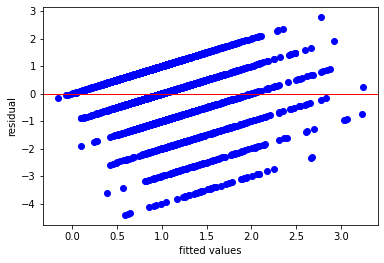

In [89]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [90]:
#Performing Bartlett's Test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


###Approach 2: Logistic Regression

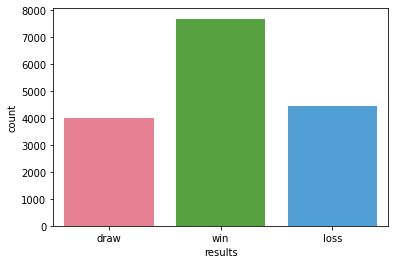

In [91]:
# Checking that our target variable is binary
sns.countplot(x='results',data=fifa_final, palette='husl')

In [92]:
fifa_final.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,result,results
0,1993-08,Colombia,Paraguay,0,0,2,19,67,0,draw
1,1993-08,Colombia,Argentina,2,1,2,19,5,1,win
2,1993-08,Colombia,Peru,4,0,2,19,70,4,win
3,1993-08,Peru,Argentina,0,1,2,70,5,-1,loss
4,1993-08,Peru,Colombia,0,1,2,70,19,-1,loss


In [93]:
#Dropping the result column
fifa_final = fifa_final.drop('result', 1)

In [94]:
#Encoding the results column

fifa_final['results'] = le.fit_transform(fifa_final['results'])

In [95]:
fifa_final.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,results
0,1993-08,Colombia,Paraguay,0,0,2,19,67,0
1,1993-08,Colombia,Argentina,2,1,2,19,5,2
2,1993-08,Colombia,Peru,4,0,2,19,70,2
3,1993-08,Peru,Argentina,0,1,2,70,5,1
4,1993-08,Peru,Colombia,0,1,2,70,19,1


In [96]:
#Defining the target variable and attributes
X =fifa_final.drop(columns= ['date', 'home_team',	'away_team','results'])
y =fifa_final.results

In [97]:
#Splitting the dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [98]:
# Fitting our model

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [100]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1223,    0,    0],
       [   0, 1339,    0],
       [   0,    0, 2286]])

In [101]:
from sklearn.metrics import accuracy_score
print('Accuracy' , accuracy_score(y_test, y_pred))

Accuracy 1.0


##8.Challenging the Solution

In [102]:
#Challenging model 1

#Importing the necessary libraries

from sklearn.model_selection import KFold

In [103]:
X = fifa_final[['home_team_rank','away_team_rank','tournament']].values
y = fifa_final['home_score'].values

folds = KFold(n_splits=5)
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set.
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.1846377691773529

Training model 2
Model 2 Root Mean Squared Error: 1.1712619503783697

Training model 3
Model 3 Root Mean Squared Error: 1.144320738381865

Training model 4
Model 4 Root Mean Squared Error: 1.1622800660317398

Training model 5
Model 5 Root Mean Squared Error: 1.1466569501997779


In [104]:
np.mean(RMSES)

1.1618314948338209

As you can see, the average is slightly more than our initial RMSE value(1.156). However in this case, it might be worthwile to pick model 3 instead.

In [105]:
#challenging model 2

X = fifa_final[['home_team_rank','away_team_rank','tournament']].values
y = fifa_final['away_score'].values

folds = KFold(n_splits=5)
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.0323197997112177

Training model 2
Model 2 Root Mean Squared Error: 1.0583784154496934

Training model 3
Model 3 Root Mean Squared Error: 1.0241403106100648

Training model 4
Model 4 Root Mean Squared Error: 1.012513553266003

Training model 5
Model 5 Root Mean Squared Error: 1.0172699176855002


In [106]:
np.mean(RMSES)

1.0289243993444959

As you can see, the average is fairly close to our initial RMSE value(1.035). However in this case, it might be worthwile to pick model 4 instead.

##9.Follow up Questions

### a)Did we have the right data?

No we didn't. We need more data to make proper predictions.

###b)Do we need other data to answer our question?

Most definitely. We need more features to be able to make better predictions..

###c)Did we have the right question?

Yes. Predicting the outcome of a match from previous scores is quite fun.

##Conclusion

Polynomial and Logistic Regression are not the best regression methods for this kind of dataset hence other Modelling techniques should be considered to predict the FIFA outcomes.